In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from functions import *
from Layer import Layer, Input
from utils import *

In [2]:
df = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.train')
df_test = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.test')

In [3]:
df

,target,attr1,attr2,attr3,attr4,attr5,attr6,id
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2,data_416
120,1,3,3,2,3,1,2,data_426
121,1,3,3,2,3,2,2,data_428
122,1,3,3,2,3,3,2,data_430


In [4]:
#df = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.train")
#df_test = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.test")

In [5]:
X_train, y_train = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test, y_test = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

In [6]:
X_train = onehot_encoding(X_train)
X_test = onehot_encoding(X_test)

In [7]:
early_stopping = {'patience' : 150,
                  'monitor' : 'val_accuracy',
                  'verbose' : 0,
                  'compare_function': np.greater_equal}

reduce_eta = {'patience' : 75,
              'monitor' : 'val_accuracy',
              'factor' : 0.5,
              'verbose' : 0,
              'compare_function': np.greater_equal}

callbacks = {'early_stopping': None,
             'reduce_eta': None}

In [8]:
input_layer = Input(17)
hidden_layer = Layer(input_layer, 4, 'sigm')
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])
history = model.train(X_train, y_train.reshape((1,X_train.shape[1])), epochs = 500,
                                    eta = 0.1, lam = 0., alpha=0.5, n_batch = 99,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    use_opt = 0
                                    )

Epoch 0: train_loss: 6.839e-01, val_loss: 6.834e-01; train_accuracy: 5.051e+01, val_accuracy: 4.800e+01  train_MSE: 2.456e-01, val_MSE: 2.454e-01  lr : 0.1
Epoch 1: train_loss: 6.635e-01, val_loss: 6.571e-01; train_accuracy: 5.051e+01, val_accuracy: 4.800e+01  train_MSE: 2.359e-01, val_MSE: 2.325e-01  lr : 0.1
Epoch 2: train_loss: 6.284e-01, val_loss: 6.346e-01; train_accuracy: 6.970e+01, val_accuracy: 6.800e+01  train_MSE: 2.193e-01, val_MSE: 2.225e-01  lr : 0.1
Epoch 3: train_loss: 5.797e-01, val_loss: 5.943e-01; train_accuracy: 6.566e+01, val_accuracy: 7.200e+01  train_MSE: 2.017e-01, val_MSE: 2.045e-01  lr : 0.1
Epoch 4: train_loss: 5.597e-01, val_loss: 6.062e-01; train_accuracy: 7.576e+01, val_accuracy: 6.400e+01  train_MSE: 1.906e-01, val_MSE: 2.185e-01  lr : 0.1
Epoch 5: train_loss: 5.104e-01, val_loss: 6.216e-01; train_accuracy: 7.980e+01, val_accuracy: 6.000e+01  train_MSE: 1.714e-01, val_MSE: 2.258e-01  lr : 0.1
Epoch 6: train_loss: 4.932e-01, val_loss: 5.451e-01; train_accur

In [9]:
np.ones(X_train.shape).shape

(17, 124)

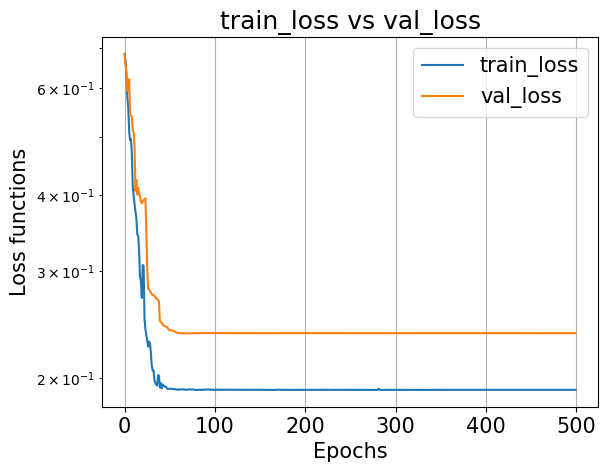

In [10]:
plt.plot(history['train_loss'],label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

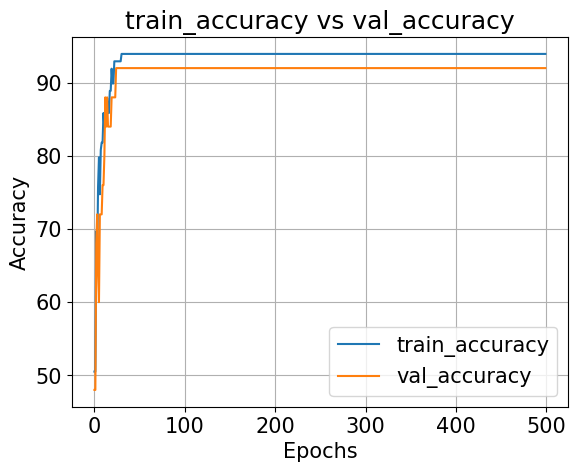

In [11]:
plt.plot(history['train_accuracy'],label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

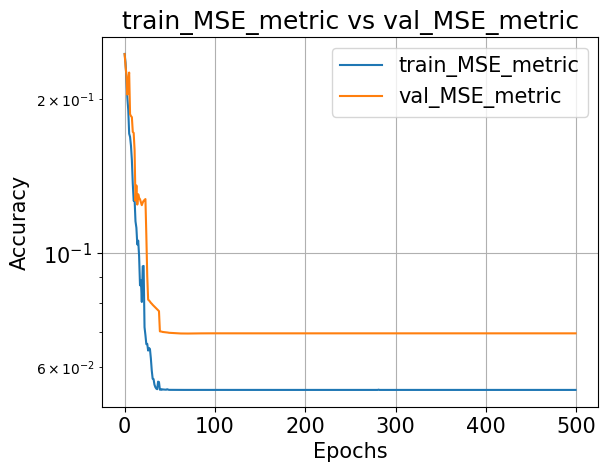

In [12]:
plt.plot(history['train_MSE'],label='train_MSE_metric')
plt.plot(history['val_MSE'], label='val_MSE_metric')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_MSE_metric vs val_MSE_metric', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(accuracy(y_pred, y_test.reshape(y_pred.shape)))

91.66666666666666


In [15]:
a = np.array([1,2,3]).reshape((1,3))
print(a.shape)

(1, 3)


In [16]:
np.mean(a,axis=0)

array([1., 2., 3.])

In [17]:
def prova(a):
    try:
        b = np.log(a)
        return b
    except RuntimeWarning: print('Impossibile')

In [18]:
prova(1-0.9999999999999999999999999999)

C:\Users\HP\AppData\Local\Temp\ipykernel_17220\4184142105.py:3: RuntimeWarning: divide by zero encountered in log
  b = np.log(a)


-inf

In [19]:
for k in range(0, 124, 32):
    print(min(k + 32, 124))

32
64
96
124


In [20]:
def aaa(r):
    r.pop('a')
    r.pop('b')
    return {'aaa':2}

dict = {'a':1, 'b':2,'c':3}
print(dict)
dict_copy = dict.copy()
print(dict_copy)
print(aaa(dict))
print(dict)
print(dict_copy)


{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}
{'aaa': 2}
{'c': 3}
{'a': 1, 'b': 2, 'c': 3}
